<a href="https://colab.research.google.com/github/Tanisha221/SNH05/blob/main/damage_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
!pip install split_folders

In [ ]:
import splitfolders
splitfolders.ratio('/content/ImgClassify', output="output", seed=1337, ratio=(0.9, 0.0,0.1))

Copying files: 405 files [00:00, 6252.80 files/s]


In [ ]:
BATCH = 26
IMG_WIDTH = 96
IMG_HEIGHT = 96

In [ ]:
train_loader = tf.keras.preprocessing.image_dataset_from_directory(
"/content/ImgClassify",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=BATCH
)

Found 399 files belonging to 4 classes.


In [ ]:
test_loader = tf.keras.preprocessing.image_dataset_from_directory(
"/content/ImgClassify",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=BATCH
)

Found 399 files belonging to 4 classes.


In [ ]:
validation_loader = tf.keras.preprocessing.image_dataset_from_directory(
"/content/ImgClassify",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=BATCH
)

Found 399 files belonging to 4 classes.


In [ ]:
class_names = train_loader.class_names
print(class_names)

['mild', 'moderate', 'nil', 'severe']


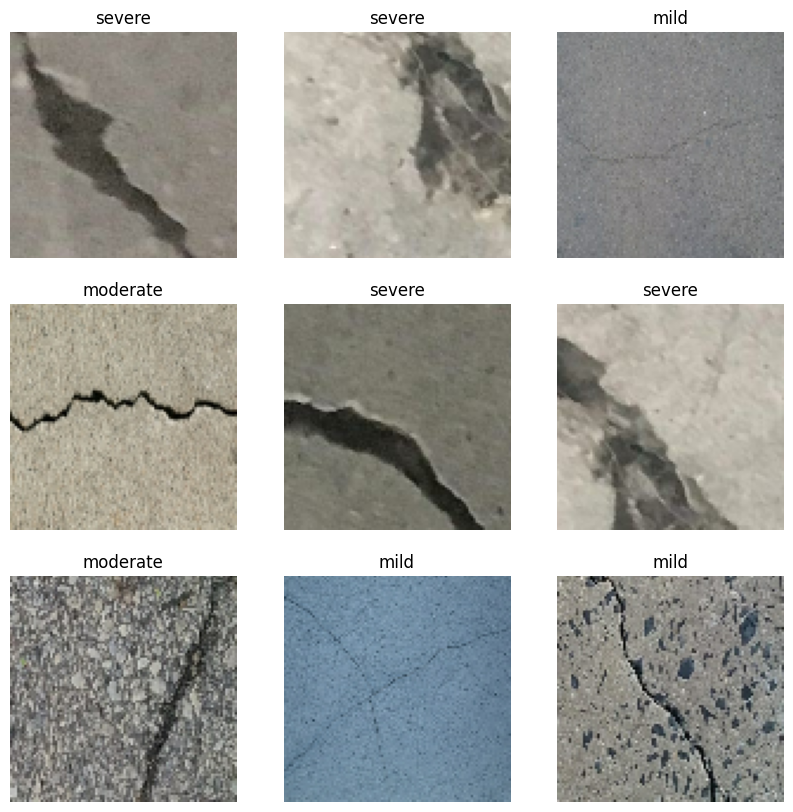

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_loader.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_loader.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_loader.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = validation_loader.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(IMG_HEIGHT, IMG_WIDTH,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


model = tf.keras.models.Sequential([
    data_augmentation,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(class_names))
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 96, 96, 3)         0         
                                                                 
 rescaling (Rescaling)       (None, 96, 96, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                 

In [ ]:
epochs = 25
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/25
16/16 [==============================] - 0s 24ms/step - loss: 0.3514 - accuracy: 0.8371 - val_loss: 0.7390 - val_accuracy: 0.7945
Epoch 2/25
16/16 [==============================] - 0s 22ms/step - loss: 0.4100 - accuracy: 0.8571 - val_loss: 0.5554 - val_accuracy: 0.8045
Epoch 3/25
16/16 [==============================] - 0s 13ms/step - loss: 0.3724 - accuracy: 0.8647 - val_loss: 0.3606 - val_accuracy: 0.8596
Epoch 4/25
16/16 [==============================] - 0s 12ms/step - loss: 0.3231 - accuracy: 0.8822 - val_loss: 0.3780 - val_accuracy: 0.8571
Epoch 5/25
16/16 [==============================] - 0s 13ms/step - loss: 0.2977 - accuracy: 0.8922 - val_loss: 0.5579 - val_accuracy: 0.8195
Epoch 6/25
16/16 [==============================] - 0s 13ms/step - loss: 0.2778 - accuracy: 0.8897 - val_loss: 0.4727 - val_accuracy: 0.8396
Epoch 7/25
16/16 [==============================] - 0s 13ms/step - loss: 0.3014 - accuracy: 0.8672 - val_loss: 0.5515 - val_accuracy: 0.8296
Epoch 8/25
16

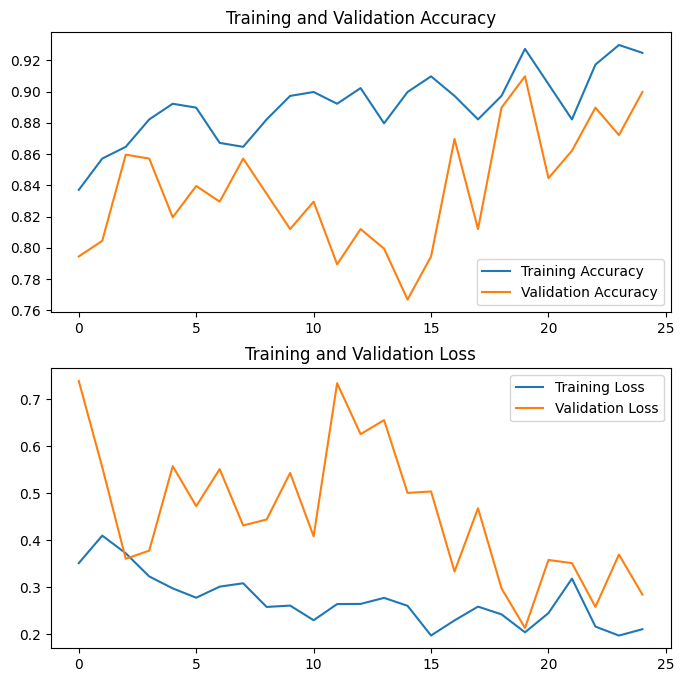

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)




plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 77ms/step


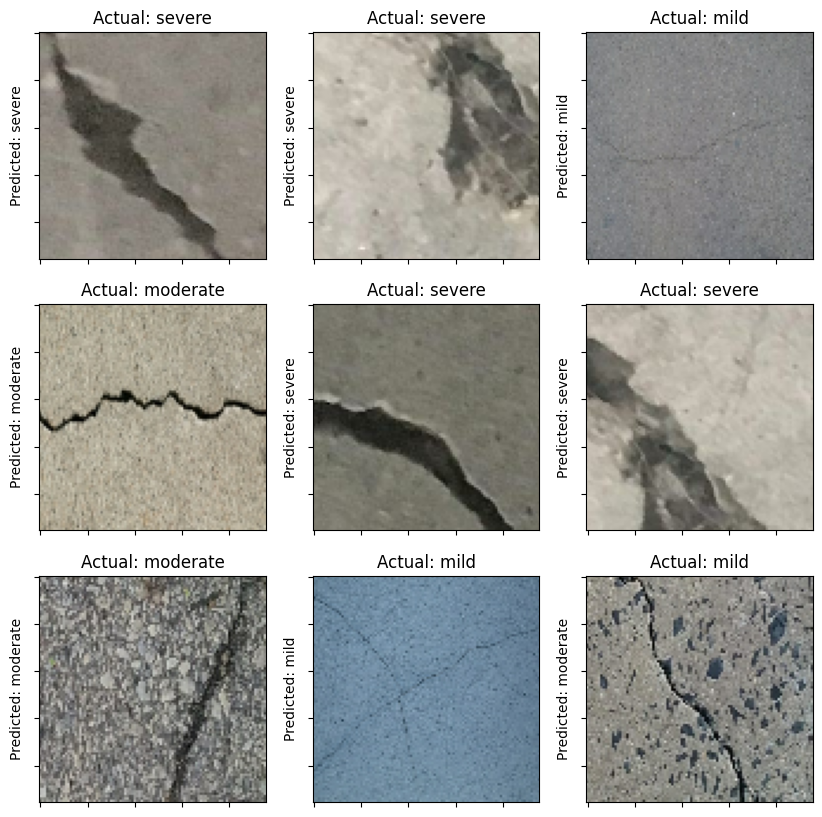

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in test_loader.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        plt.ylabel("Predicted: "+class_names[np.argmax(score)])
        plt.title("Actual: "+class_names[labels[i]])
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

In [ ]:
model.save('damage_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
